In [3]:
#Importando a biblioteca pandas
import pandas as pd

In [5]:
#Leitura dos arquivos
#Pode ser usado parâmetros na hora de atribuir os arquivos como sheet_name pra varias abas
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [6]:
#Juntando os 5 arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Fazendo a leitura dos arquivos
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
230,Salvador,2019-01-03,184.69,1036,1
231,Salvador,2019-01-03,89.85,1034,2
232,Salvador,2019-01-03,167.76,1034,3
233,Salvador,2019-01-03,172.40,1036,2
234,Salvador,2019-01-03,48.39,1035,2
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Vendo as 10 ultimas linhas
df.tail(10)

,Cidade,Data,Vendas,LojaID,Qtde
230,Salvador,2019-01-03,184.69,1036,1
231,Salvador,2019-01-03,89.85,1034,2
232,Salvador,2019-01-03,167.76,1034,3
233,Salvador,2019-01-03,172.40,1036,2
234,Salvador,2019-01-03,48.39,1035,2
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Pega amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
94,Fortaleza,2019-01-01,150.49,1003,5
65,Aracaju,2018-01-01,145.54,1522,3
44,Recife,2019-01-01,142.21,983,8
89,Recife,2019-01-01,18.11,980,3
42,Salvador,2019-01-01,44.28,1034,1


In [ ]:
#Verificando o tipo de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#Como alterar tipo de dado de determinada coluna
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Cons ultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos das linhas faltantes
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
#Ver medias de vendas
df["Vendas"].mean()

122.61180089485458

In [ ]:
#Substituindo valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando linhas com valores faltantes com base em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Apagando linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [8]:
#Criando novas colunas
#Criando a coluna receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Conseguindo a coluna quantidade caso nao tivesse
#df["Receita/Vendas"] = df["Receita"] / df["Vendas"]


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest , que de acordo com os parâmetros retorna os dados de maior receita no caso
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#nsmallest, que retorna as menores receitas no caso
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [9]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [10]:
#Ordenando por receitas
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [ ]:
#Trabalhando com datas

In [ ]:
#Tranformar data pro formato int
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df["Data"].dtypes

dtype('int64')

In [ ]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [11]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [12]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
144,Salvador,2019-01-02,23.38,1034,1,23.38,2019
116,Natal,2019-01-02,41.78,1034,3,125.34,2019
128,Salvador,2019-03-02,36.84,1034,1,36.84,2019
16,Fortaleza,2019-01-01,97.32,1002,5,486.60,2019
58,Salvador,2019-01-01,20.64,1037,2,41.28,2019


In [13]:
#Extraindo o mês e o dia da venda
df["Mês_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_venda,Diferenca_dias
18,Aracaju,2018-01-01,32.14,1522,6,192.84,2018,1,1,0 days
86,Fortaleza,2019-01-01,42.11,1004,3,126.33,2019,1,1,365 days
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2,425 days
19,Recife,2019-01-01,199.43,983,7,1396.01,2019,1,1,365 days
58,Aracaju,2018-01-01,37.14,1520,7,259.98,2018,1,1,0 days


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [14]:
#Calculando a diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [15]:
#Criando a coluna trimestre
df["Trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_venda,Diferenca_dias,Trimestre_venda
160,Salvador,2019-01-02,11.76,1034,1,11.76,2019,1,2,366 days,1
42,Recife,2019-01-01,161.45,983,3,484.35,2019,1,1,365 days,1
191,Natal,2019-01-02,173.59,1034,2,347.18,2019,1,2,366 days,1
212,Salvador,2019-01-02,50.73,1037,3,152.19,2019,1,2,366 days,1
126,Fortaleza,2019-03-02,41.87,980,8,334.96,2019,3,2,425 days,1


In [16]:
#Filtrando as vendas de 2019 e mês de março
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_venda,Dia_venda,Diferenca_dias,Trimestre_venda
18,Natal,2019-03-14,581.00,853,3,1743.00,2019,3,14,437 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
45,Natal,2019-03-11,431.00,852,3,1293.00,2019,3,11,434 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days,1
32,Natal,2019-03-17,244.00,854,2,488.00,2019,3,17,440 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,2019,3,2,425 days,1


In [ ]:
#Visualização de dados

In [ ]:
#Faz a contagem de vendas por ID
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

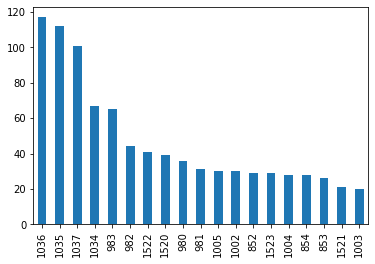

In [17]:
#Criando grafico com total de vendas
df["LojaID"].value_counts(ascending=False).plot.bar()

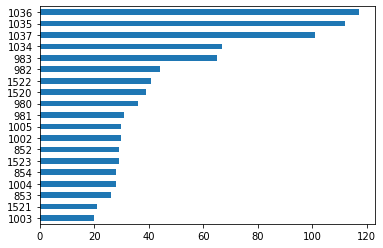

In [ ]:
#Gráfico com barras horizontais, passar ponto e vírgula pra sumir linha emcima do grafico
df["LojaID"].value_counts(ascending=True).plot.barh();

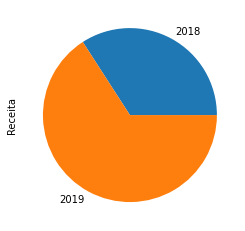

In [ ]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total vendas')

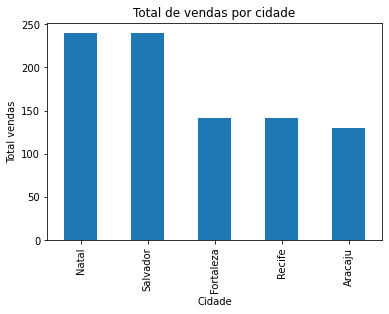

In [21]:
#Adcionando titulo ao gráfico e alterando nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas")

Text(0, 0.5, 'Total vendas')

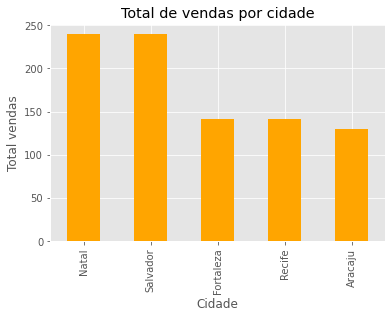

In [ ]:
#Alterando cor do gráfico
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="orange")
plt.xlabel("Cidade")
plt.ylabel("Total vendas")

In [ ]:
#Alterando o estilo
plt.style.use("ggplot")

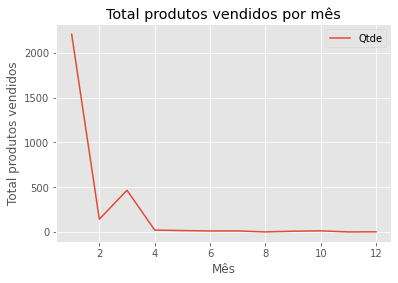

In [ ]:
df.groupby(df["Mês_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês");
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()

In [ ]:
df.groupby(df["Mês_venda"])["Qtde"].sum()

Mês_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [18]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

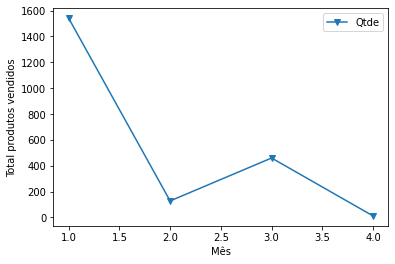

In [22]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["Mês_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()

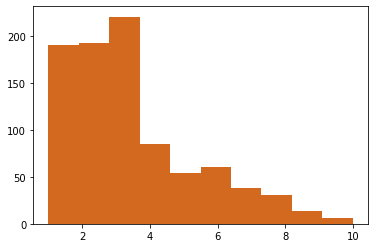

In [25]:
#Histograma
plt.hist(df["Qtde"], color="chocolate");

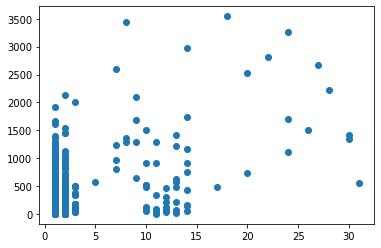

In [26]:
#Gráfico de dispersão
plt.scatter(x=df_2019["Dia_venda"], y = df_2019["Receita"]);

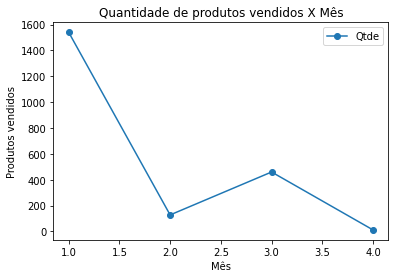

In [27]:
#Salvando imagens dos graficos em png
df_2019.groupby(df_2019["Mês_venda"])["Qtde"].sum().plot(marker="o");
plt.title("Quantidade de produtos vendidos X Mês")
plt.xlabel("Mês")
plt.ylabel("Produtos vendidos")
plt.legend()
plt.savefig("Grafico QTDE x MES.png")